# <center>Richmond Condo Data Project<center>

![SegmentLocal](richmond.png "segment")

Condos are a great investment opportunity for both speculators and home-buyers alike. Not only are do they require less capital to purchase on average compared to houses, because of their affordability and ease of moving in and out, they are also more *liquid*, meaning that condos are relatively easier to buy and sell.

People don't just buy condos to live in them--they buy them as an investment and expect it will appreciate. Unlike other assets, like equities, the value of a property can be nebulous at times, and it can be difficult to now how "in demand" or "liquid" a property is, which are crucial factors that most buyers want to know. The best that buyers and their agents can do is usually make educated guesses.

Is there a way we can make this guess more quantifiable?

The best indicator for how "hot" a property is likely to be is **Days on the Market (DOM)**. This number, as you can guess, refers to how many days a property is on the market until a deal is closed.

The smaller the timeframe between the date it is first listed and the date it is closed, the more *in demand* a property is, which is related to how fast a condo might appreciate.

For this project, I will be helping a friend of mine who is a real estate agent based in Richmond, BC, Canada. When it comes to doing business as a real estate agent, developing that sense of trust between a client and their agent is paramount. Part of building that trust comes from providing all the information that a client needs to conduct their own due diligence. 

With that in mind, my friend would like to be able to develop a way to predict the DOM of any listing. This number reveals ultimately how in demand a property is, and like I mentioned before can be correlated to future appreciation. This is information that no other real estate agent he knows of can provide, which will be extremely helpful for prospective clients and could help his business a lot.

# Looking at the Data

Let's begin by taking a look at the data.

This data covers residential detached condo/apartment listings in Richmond, BC between the dates of 01-01-2008 and 06-12-2021.

Here are the columns of the dataset:

**ML #** - a unique ID code for each transaction.

**Address** - address of listing.

**Sub-Area/Community** - the neighbourhood in Richmond where the listing is located.

**List Date** - the date the listing is first put on the market.

**Month** - the month that the listing is first put on the market.

**Prime Rate** - the prime lending rate at the time the listing is first put on the market, as set by the Bank of Canada.

**Sold Date** – the date the listing is sold.

**DOM** - days on the market.

**List Price** - the initial price when the listing is first put on the market.

**Sold Price** - the final sold price.

**List Price per SqFt** - list price divided by total square footage.

**Sold Price per SqFt** - sold price divided by total square footage.

**SP/LP Ratio** - sold price divided by list price.

**Total BR** - total bedrooms.

**Total Baths** - total bathrooms.

**TotFlArea** - total square footage.

**Yr Built** - year built.

**Age** - age of building on the date it was listed.

Goals:
- Figure out which factors are correlated with DOM (**hypothesis**: I predict communities, list price, month, and SL/LP ratio will be significantly correlated).
- Develop a model that is able to predict DOM.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Richmond_Condos_2008-2021.csv')
df.head()

,ML #,Address,Sub-Area/Community,List Date,Month,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,SL/LP Ratio,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age
0,V682144,6 7380 ELMBRIDGE WAY,Brighouse,1/1/2008,1,0.06,1/27/2008,26,"368,000.00","348,000.00",282.21,266.87,0.946,2,3,"1,304",1996,11
1,V682051,506 9188 HEMLOCK DRIVE,McLennan North,1/2/2008,1,0.06,1/5/2008,3,"308,000.00","293,000.00",473.85,450.77,0.951,1,1,650,2006,1
2,V682101,1200 7760 GRANVILLE AVENUE,Brighouse South,1/2/2008,1,0.06,1/7/2008,5,"498,000.00","476,800.00",334.68,320.43,0.957,4,2,"1,488",1997,10
3,V681921,1304 6088 MINORU BOULEVARD,Brighouse,1/2/2008,1,0.06,2/11/2008,40,"488,000.00","473,000.00",466.54,452.20,0.969,2,2,"1,046",1997,10
4,V682478,303 8100 JONES ROAD,Brighouse South,1/2/2008,1,0.06,1/23/2008,21,"299,800.00","282,800.00",340.30,321.00,0.943,2,1,881,1996,11


In [2]:
# Converting objects to numbers and checking out how many rows we have

df['List Date'] =  pd.to_datetime(df['List Date'], infer_datetime_format=True)
df['Sold Date'] =  pd.to_datetime(df['Sold Date'], infer_datetime_format=True)
df['List Price'] = df['List Price'].apply(lambda x: x.replace(',', ''))
df["List Price"] = df["List Price"].astype(float)
df['Sold Price'] = df['Sold Price'].apply(lambda x: x.replace(',', ''))
df["Sold Price"] = df["Sold Price"].astype(float)
df['Sold Price per SqFt'] = df['Sold Price per SqFt'].apply(lambda x: x.replace(',', ''))
df["Sold Price per SqFt"] = df["Sold Price per SqFt"].astype(float)
df['TotFlArea'] = df['TotFlArea'].apply(lambda x: x.replace(',', ''))
df["TotFlArea"] = df["TotFlArea"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ML #                 23547 non-null  object        
 1   Address              23547 non-null  object        
 2   Sub-Area/Community   23547 non-null  object        
 3   List Date            23547 non-null  datetime64[ns]
 4   Month                23547 non-null  int64         
 5   Prime Rate           23547 non-null  float64       
 6   Sold Date            23547 non-null  datetime64[ns]
 7   DOM                  23547 non-null  int64         
 8   List Price           23547 non-null  float64       
 9   Sold Price           23547 non-null  float64       
 10  List Price per SqFt  23547 non-null  float64       
 11  Sold Price per SqFt  23547 non-null  float64       
 12  SL/LP Ratio          23547 non-null  float64       
 13  Tot BR               23547 non-

Here we see that we have 23,547 listings.

In [3]:
df.isnull().sum() # checking to see if there is any null data

ML #                   0
Address                0
Sub-Area/Community     0
List Date              0
Month                  0
Prime Rate             0
Sold Date              0
DOM                    0
List Price             0
Sold Price             0
List Price per SqFt    0
Sold Price per SqFt    0
SL/LP Ratio            0
Tot BR                 0
Tot Baths              0
TotFlArea              0
Yr Blt                 0
Age                    0
dtype: int64

In [4]:
df.duplicated().sum() # checking to see if there is any duplicated data

0

In [5]:
df["Sub-Area/Community"].value_counts() # looking at how many listings we have for each neighbourhood

Brighouse            9706
Brighouse South      4228
West Cambie          2850
McLennan North       1814
Steveston South      1595
Riverdale RI          787
Boyd Park             584
South Arm             383
Bridgeport RI         312
Ironwood              249
Steveston North       156
Broadmoor             152
East Richmond         147
Granville             143
East Cambie            97
Garden City            70
Quilchena RI           64
Steveston Village      57
Hamilton RI            55
Saunders               49
Terra Nova             26
Woodwards              19
Seafair                 1
Westwind                1
Sea Island              1
Lackner                 1
Name: Sub-Area/Community, dtype: int64

In [6]:
# Aggregating the last five neighbourhoods into one category called "Other"

df.replace(to_replace =["Woodwards", "Westwind", "Seafair", "Lackner", "Sea Island"], 
                            value ="Other", inplace=True)
df["Sub-Area/Community"].value_counts()

Brighouse            9706
Brighouse South      4228
West Cambie          2850
McLennan North       1814
Steveston South      1595
Riverdale RI          787
Boyd Park             584
South Arm             383
Bridgeport RI         312
Ironwood              249
Steveston North       156
Broadmoor             152
East Richmond         147
Granville             143
East Cambie            97
Garden City            70
Quilchena RI           64
Steveston Village      57
Hamilton RI            55
Saunders               49
Terra Nova             26
Other                  23
Name: Sub-Area/Community, dtype: int64

# Exploratory Analysis

In [7]:
df.describe()

,Month,Prime Rate,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,SL/LP Ratio,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age
count,23547.000000,23547.000000,23547.000000,2.354700e+04,2.354700e+04,23547.000000,23547.000000,23547.000000,23547.000000,23547.000000,23547.000000,23547.000000,23547.000000
mean,5.837601,0.030285,44.082898,4.498612e+05,4.397228e+05,509.951690,499.239818,0.977559,1.759757,1.624666,893.565550,1999.777806,14.770374
std,3.296582,0.006965,55.648081,2.187351e+05,2.097046e+05,193.559492,190.837813,0.040416,0.609738,0.555231,243.698719,13.483299,13.166742
min,1.000000,0.022500,0.000000,4.000000e+04,3.600000e+04,101.150000,89.910000,0.588000,0.000000,0.000000,302.000000,1922.000000,0.000000
25%,3.000000,0.027000,8.000000,3.128000e+05,3.050000e+05,364.815000,355.215000,0.958000,1.000000,1.000000,726.000000,1990.000000,3.000000
50%,6.000000,0.030000,24.000000,4.100000e+05,4.050000e+05,481.440000,471.600000,0.977000,2.000000,2.000000,872.000000,2004.000000,11.000000
75%,9.000000,0.030000,60.000000,5.450000e+05,5.350000e+05,625.470000,618.935000,0.995000,2.000000,2.000000,1001.000000,2010.000000,24.000000
max,12.000000,0.060000,1166.000000,4.266000e+06,3.850000e+06,1400.000000,1421.890000,1.421000,5.000000,7.000000,4502.000000,2023.000000,94.000000


# Correlation Chart

<AxesSubplot:>

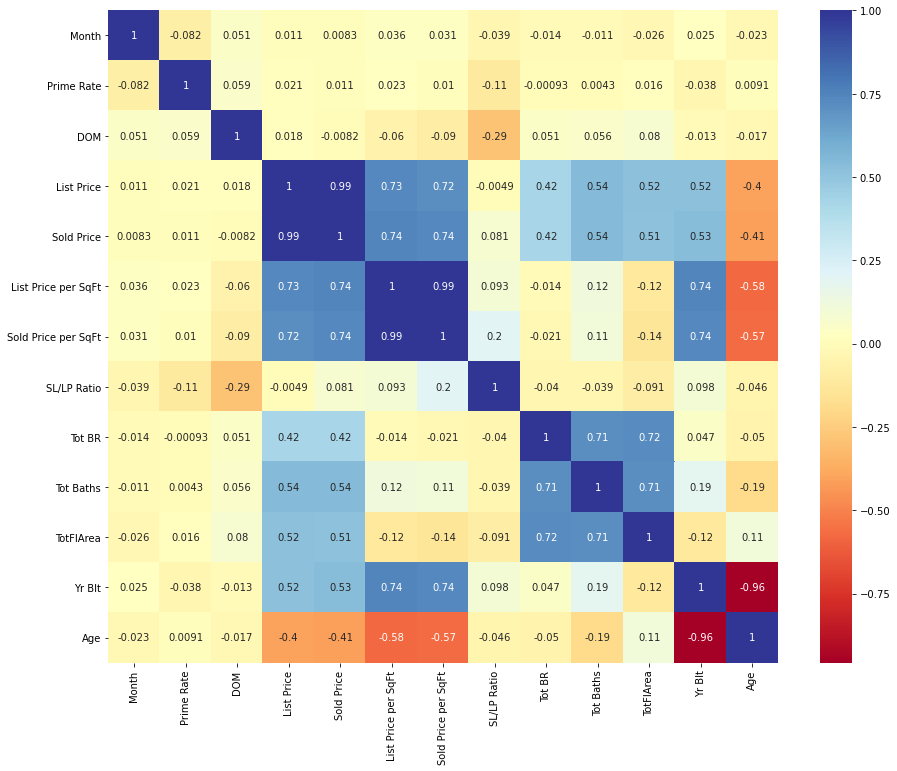

In [8]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),cmap='RdYlBu', annot=True)

# Transforming Data for Regression

One hot encoding.

In [9]:
y = pd.get_dummies(df["Sub-Area/Community"]) #One hot encoding the neighbourhood
df = df.drop('Sub-Area/Community',axis = 1)
df = df.join(y)

In [10]:
df

,ML #,Address,List Date,Month,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,...,Other,Quilchena RI,Riverdale RI,Saunders,South Arm,Steveston North,Steveston South,Steveston Village,Terra Nova,West Cambie
0,V682144,6 7380 ELMBRIDGE WAY,2008-01-01,1,0.0600,2008-01-27,26,368000.0,348000.0,282.21,...,0,0,0,0,0,0,0,0,0,0
1,V682051,506 9188 HEMLOCK DRIVE,2008-01-02,1,0.0600,2008-01-05,3,308000.0,293000.0,473.85,...,0,0,0,0,0,0,0,0,0,0
2,V682101,1200 7760 GRANVILLE AVENUE,2008-01-02,1,0.0600,2008-01-07,5,498000.0,476800.0,334.68,...,0,0,0,0,0,0,0,0,0,0
3,V681921,1304 6088 MINORU BOULEVARD,2008-01-02,1,0.0600,2008-02-11,40,488000.0,473000.0,466.54,...,0,0,0,0,0,0,0,0,0,0
4,V682478,303 8100 JONES ROAD,2008-01-02,1,0.0600,2008-01-23,21,299800.0,282800.0,340.30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,R2564618,211 5700 ANDREWS ROAD,2021-04-12,4,0.0245,2021-04-15,3,558800.0,558800.0,721.03,...,0,0,0,0,0,0,1,0,0,0
23543,R2564074,326 5800 ANDREWS ROAD,2021-04-12,4,0.0245,2021-04-19,7,619000.0,621000.0,573.15,...,0,0,0,0,0,0,1,0,0,0
23544,R2564090,212 7251 MINORU BOULEVARD,2021-04-12,4,0.0245,2021-04-20,8,498000.0,500000.0,478.85,...,0,0,0,0,0,0,0,0,0,0
23545,R2565857,209 9300 PARKSVILLE DRIVE,2021-04-12,4,0.0245,2021-04-20,8,399800.0,401000.0,473.14,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = pd.get_dummies(df["Month"]) #One hot encoding the month
df = df.drop('Month',axis = 1)
df = df.join(y)

In [12]:
df

,ML #,Address,List Date,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,...,3,4,5,6,7,8,9,10,11,12
0,V682144,6 7380 ELMBRIDGE WAY,2008-01-01,0.0600,2008-01-27,26,368000.0,348000.0,282.21,266.87,...,0,0,0,0,0,0,0,0,0,0
1,V682051,506 9188 HEMLOCK DRIVE,2008-01-02,0.0600,2008-01-05,3,308000.0,293000.0,473.85,450.77,...,0,0,0,0,0,0,0,0,0,0
2,V682101,1200 7760 GRANVILLE AVENUE,2008-01-02,0.0600,2008-01-07,5,498000.0,476800.0,334.68,320.43,...,0,0,0,0,0,0,0,0,0,0
3,V681921,1304 6088 MINORU BOULEVARD,2008-01-02,0.0600,2008-02-11,40,488000.0,473000.0,466.54,452.20,...,0,0,0,0,0,0,0,0,0,0
4,V682478,303 8100 JONES ROAD,2008-01-02,0.0600,2008-01-23,21,299800.0,282800.0,340.30,321.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,R2564618,211 5700 ANDREWS ROAD,2021-04-12,0.0245,2021-04-15,3,558800.0,558800.0,721.03,721.03,...,0,1,0,0,0,0,0,0,0,0
23543,R2564074,326 5800 ANDREWS ROAD,2021-04-12,0.0245,2021-04-19,7,619000.0,621000.0,573.15,575.00,...,0,1,0,0,0,0,0,0,0,0
23544,R2564090,212 7251 MINORU BOULEVARD,2021-04-12,0.0245,2021-04-20,8,498000.0,500000.0,478.85,480.77,...,0,1,0,0,0,0,0,0,0,0
23545,R2565857,209 9300 PARKSVILLE DRIVE,2021-04-12,0.0245,2021-04-20,8,399800.0,401000.0,473.14,474.56,...,0,1,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler # for normilization of the data

scaler = StandardScaler()
scale_rate = scaler.fit_transform(df[['Prime Rate']]) 
df['Prime Rate'] = scale_rate
scale_price = scaler.fit_transform(df[['List Price']]) 
df['List Price'] = scale_price
scale_built = scaler.fit_transform(df[['Yr Blt']]) 
df['Yr Blt'] = scale_built
scale_age = scaler.fit_transform(df[['Age']]) 
df['Age'] = scale_age
scale_br = scaler.fit_transform(df[['Tot BR']]) 
df['Tot BR'] = scale_br
scale_bath = scaler.fit_transform(df[['Tot Baths']]) 
df['Tot Baths'] = scale_bath
scale_area = scaler.fit_transform(df[['TotFlArea']]) 
df['TotFlArea'] = scale_area

df

,ML #,Address,List Date,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,...,3,4,5,6,7,8,9,10,11,12
0,V682144,6 7380 ELMBRIDGE WAY,2008-01-01,4.266599,2008-01-27,26,-0.374256,348000.0,282.21,266.87,...,0,0,0,0,0,0,0,0,0,0
1,V682051,506 9188 HEMLOCK DRIVE,2008-01-02,4.266599,2008-01-05,3,-0.648566,293000.0,473.85,450.77,...,0,0,0,0,0,0,0,0,0,0
2,V682101,1200 7760 GRANVILLE AVENUE,2008-01-02,4.266599,2008-01-07,5,0.220083,476800.0,334.68,320.43,...,0,0,0,0,0,0,0,0,0,0
3,V681921,1304 6088 MINORU BOULEVARD,2008-01-02,4.266599,2008-02-11,40,0.174364,473000.0,466.54,452.20,...,0,0,0,0,0,0,0,0,0,0
4,V682478,303 8100 JONES ROAD,2008-01-02,4.266599,2008-01-23,21,-0.686055,282800.0,340.30,321.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,R2564618,211 5700 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-15,3,0.498050,558800.0,721.03,721.03,...,0,1,0,0,0,0,0,0,0,0
23543,R2564074,326 5800 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-19,7,0.773275,621000.0,573.15,575.00,...,0,1,0,0,0,0,0,0,0,0
23544,R2564090,212 7251 MINORU BOULEVARD,2021-04-12,-0.830631,2021-04-20,8,0.220083,500000.0,478.85,480.77,...,0,1,0,0,0,0,0,0,0,0
23545,R2565857,209 9300 PARKSVILLE DRIVE,2021-04-12,-0.830631,2021-04-20,8,-0.228872,401000.0,473.14,474.56,...,0,1,0,0,0,0,0,0,0,0


# Linear Regression

In [14]:
x=df.drop(columns=['ML #','Address','List Date','Sold Date','Sold Price','DOM','Sold Price per SqFt'],axis=1) #independent
y=df['DOM'] #dependent

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.75,random_state=1)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17660, 43)
(5887, 43)
(17660,)
(5887,)


In [17]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_predict=model.predict(x_test)

In [19]:
from sklearn.metrics import r2_score,mean_squared_error

r2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
print('Accuracy is : ' + str(round(r2*100,2))) # It's R square value
print('Mean Square Error :',MSE)

Accuracy is : 10.24
Mean Square Error : 2818.8670562503485


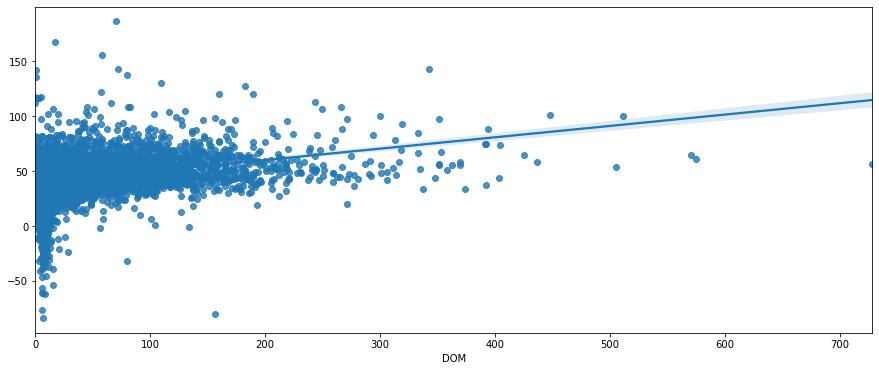

In [20]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_predict) 
plt.show()

In [21]:
y_error=y_test-y_predict
accuracy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error,accuracy
                                 ])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accuracy%'})
error_data

,Actual,Predicted,Error,Accuracy%
0,6.0,46.675275,-40.675275,677.92
1,29.0,44.497067,-15.497067,53.44
2,66.0,55.115959,10.884041,-16.49
3,4.0,46.640542,-42.640542,1066.01
4,1.0,44.062348,-43.062348,4306.23
...,...,...,...,...
5882,8.0,49.246970,-41.246970,515.59
5883,14.0,40.641489,-26.641489,190.30
5884,24.0,29.534874,-5.534874,23.06
5885,148.0,65.214873,82.785127,-55.94


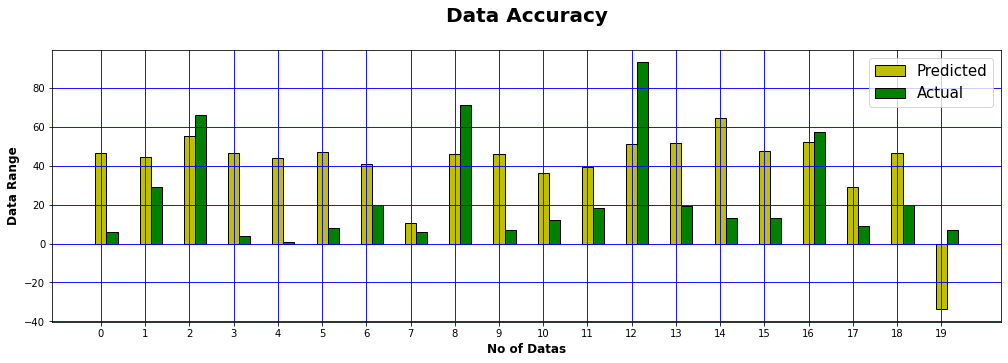

In [22]:
plt.figure(figsize=(17,5))
no_of_data_show =20 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show(25)

In [23]:
# cross-validation

from sklearn.model_selection import cross_val_score
print(cross_val_score(model, x_train, y_train, cv=5))

[0.09321872 0.1112928  0.0944891  0.08435166 0.08232411]


In [24]:
import statsmodels.api as si
mod=si.OLS(y,x)
result=mod.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    DOM   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     65.78
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:42:54   Log-Likelihood:            -1.2677e+05
No. Observations:               23547   AIC:                         2.536e+05
Df Residuals:                   23505   BIC:                         2.540e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Prime Rate              2.0308    

In [25]:
x=df.drop(columns=['ML #','Address','List Date','Sold Date','Sold Price','DOM','Sold Price per SqFt',
                  'TotFlArea','Tot Baths','Yr Blt','Tot BR'],axis=1) #independent
y=df['DOM'] #dependent

mod=si.OLS(y,x)
result=mod.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    DOM   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     72.80
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:42:54   Log-Likelihood:            -1.2677e+05
No. Observations:               23547   AIC:                         2.536e+05
Df Residuals:                   23509   BIC:                         2.539e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Prime Rate              1.9569    

# Decision Tree

Linear regression doesn't look like a good choice for modelling this data. The mean squared value is 2818, meaning that we can predict DOM within 53 days. Pretty bad. Let's see what else we can do.

Predicting DOM is a subject that has been covered before in data science. Therefore, I think that having made a first attempt on my own, I'd like to see if I can learn anything from previous studies. The research paper that I will be referencing can be found here: http://cs229.stanford.edu/proj2016/report/ermolin_predicting_Days_on_Market_for_Residential_Real_Estate_Sales_report.pdf

In this study, Ermolin attempts to do predict DOM on real estate in San Francisco. Here are the relevant takeaways that I will be applying to a second analysis:

- "Based on the review of the related work and conversations with real-estate agents, in the SF Bay area, Days-on-Market below 1 week or above 2 months or sales/list price ratio outside [0.8 : 1.2] range indicate an outlier either in a sense of mispricing or some other deficiency (poor condition, liens, title problems, etc)." To me this makes sense that it would apply to Vancouver as well, as the market is similar.
- "Linear regression performed poorly while decision-tree algorithms did better."

In [26]:
df_new = pd.read_csv('Richmond_Condos_2008-2021.csv')
df_new.head()

,ML #,Address,Sub-Area/Community,List Date,Month,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,SL/LP Ratio,Tot BR,Tot Baths,TotFlArea,Yr Blt,Age
0,V682144,6 7380 ELMBRIDGE WAY,Brighouse,1/1/2008,1,0.06,1/27/2008,26,"368,000.00","348,000.00",282.21,266.87,0.946,2,3,"1,304",1996,11
1,V682051,506 9188 HEMLOCK DRIVE,McLennan North,1/2/2008,1,0.06,1/5/2008,3,"308,000.00","293,000.00",473.85,450.77,0.951,1,1,650,2006,1
2,V682101,1200 7760 GRANVILLE AVENUE,Brighouse South,1/2/2008,1,0.06,1/7/2008,5,"498,000.00","476,800.00",334.68,320.43,0.957,4,2,"1,488",1997,10
3,V681921,1304 6088 MINORU BOULEVARD,Brighouse,1/2/2008,1,0.06,2/11/2008,40,"488,000.00","473,000.00",466.54,452.20,0.969,2,2,"1,046",1997,10
4,V682478,303 8100 JONES ROAD,Brighouse South,1/2/2008,1,0.06,1/23/2008,21,"299,800.00","282,800.00",340.30,321.00,0.943,2,1,881,1996,11


In [27]:
# filtering out the DOM outliers
low = 7
high = 60

mask = (df_new['DOM'] >= low) & (df_new['DOM'] <= high)

df_new = df_new.loc[mask]

# filtering out the SL/LP Ratio outliers
low = 0.8
high = 1.2

mask = (df_new['SL/LP Ratio'] >= low) & (df_new['SL/LP Ratio'] <= high)

df_new = df_new.loc[mask]

df_new['List Date'] =  pd.to_datetime(df_new['List Date'], infer_datetime_format=True)
df_new['Sold Date'] =  pd.to_datetime(df_new['Sold Date'], infer_datetime_format=True)
df_new['List Price'] = df_new['List Price'].apply(lambda x: x.replace(',', ''))
df_new["List Price"] = df_new["List Price"].astype(float)
df_new['Sold Price'] = df_new['Sold Price'].apply(lambda x: x.replace(',', ''))
df_new["Sold Price"] = df_new["Sold Price"].astype(float)
df_new['Sold Price per SqFt'] = df_new['Sold Price per SqFt'].apply(lambda x: x.replace(',', ''))
df_new["Sold Price per SqFt"] = df_new["Sold Price per SqFt"].astype(float)
df_new['TotFlArea'] = df_new['TotFlArea'].apply(lambda x: x.replace(',', ''))
df_new["TotFlArea"] = df_new["TotFlArea"].astype(float)

y = pd.get_dummies(df_new["Sub-Area/Community"]) #One hot encoding the neighbourhood
df_new = df_new.drop('Sub-Area/Community',axis = 1)
df_new = df_new.join(y)

y = pd.get_dummies(df_new["Month"]) #One hot encoding the month
df_new = df_new.drop('Month',axis = 1)
df_new = df_new.join(y)

scaler = StandardScaler()
scale_rate = scaler.fit_transform(df_new[['Prime Rate']]) 
df_new['Prime Rate'] = scale_rate
scale_price = scaler.fit_transform(df_new[['List Price']]) 
df_new['List Price'] = scale_price
scale_built = scaler.fit_transform(df_new[['Yr Blt']]) 
df_new['Yr Blt'] = scale_built
scale_age = scaler.fit_transform(df_new[['Age']]) 
df_new['Age'] = scale_age
scale_br = scaler.fit_transform(df_new[['Tot BR']]) 
df_new['Tot BR'] = scale_br
scale_bath = scaler.fit_transform(df_new[['Tot Baths']]) 
df_new['Tot Baths'] = scale_bath
scale_area = scaler.fit_transform(df_new[['TotFlArea']]) 
df_new['TotFlArea'] = scale_area

In [28]:
x=df_new.drop(columns=['ML #','Address','List Date','Sold Date','Sold Price','DOM','Sold Price per SqFt',
                  'TotFlArea','Tot Baths','Yr Blt','Tot BR','Prime Rate'],axis=1) #independent
y=df_new['DOM'] #dependent

mod=si.OLS(y,x)
result=mod.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    DOM   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     42.62
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          8.72e-297
Time:                        22:42:55   Log-Likelihood:                -54129.
No. Observations:               13215   AIC:                         1.083e+05
Df Residuals:                   13176   BIC:                         1.086e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
List Price              0.8182    

In [29]:
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.75,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9911, 40)
(3304, 40)
(9911,)
(3304,)


In [30]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
model = DecisionTreeRegressor(random_state = 1) 

# fit the regressor with X and Y data
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [31]:
y_predict=model.predict(x_test)

In [32]:
MSE=mean_squared_error(y_test,y_predict)
print('Mean Square Error :',MSE)

Mean Square Error : 423.43401937046


In [33]:
y_error=y_test-y_predict
accuracy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error,accuracy
                                 ])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accuracy%'})
error_data

,Actual,Predicted,Error,Accuracy%
0,14.0,15.0,-1.0,7.14
1,34.0,10.0,24.0,-70.59
2,20.0,8.0,12.0,-60.00
3,21.0,27.0,-6.0,28.57
4,22.0,14.0,8.0,-36.36
...,...,...,...,...
3299,15.0,12.0,3.0,-20.00
3300,37.0,8.0,29.0,-78.38
3301,22.0,17.0,5.0,-22.73
3302,44.0,26.0,18.0,-40.91


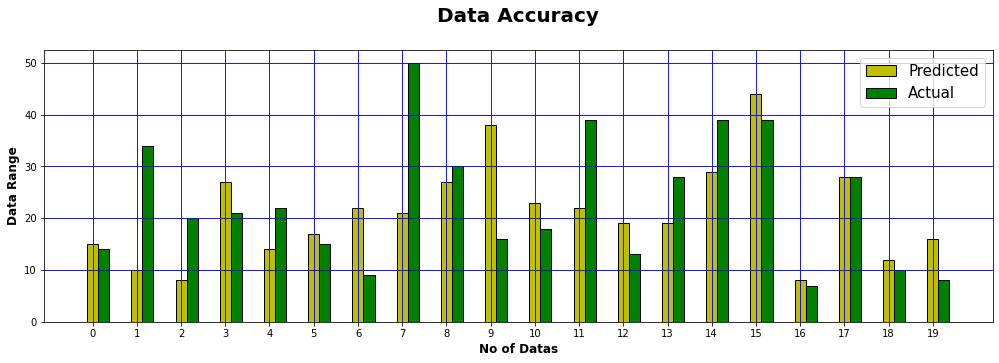

In [34]:
plt.figure(figsize=(17,5))
no_of_data_show =20 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show(25)

# Random Forest

In [35]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100, random_state=1337)
model.fit(x_train, y_train)

y_predict=model.predict(x_test)

In [36]:
MSE=mean_squared_error(y_test,y_predict)
print('Mean Square Error :',MSE)

Mean Square Error : 414.7478813559322


In [37]:
y_error=y_test-y_predict
accuracy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error,accuracy
                                 ])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accuracy%'})
error_data

,Actual,Predicted,Error,Accuracy%
0,14.0,13.0,1.0,-7.14
1,34.0,26.0,8.0,-23.53
2,20.0,50.0,-30.0,150.00
3,21.0,46.0,-25.0,119.05
4,22.0,14.0,8.0,-36.36
...,...,...,...,...
3299,15.0,12.0,3.0,-20.00
3300,37.0,18.0,19.0,-51.35
3301,22.0,8.0,14.0,-63.64
3302,44.0,36.0,8.0,-18.18


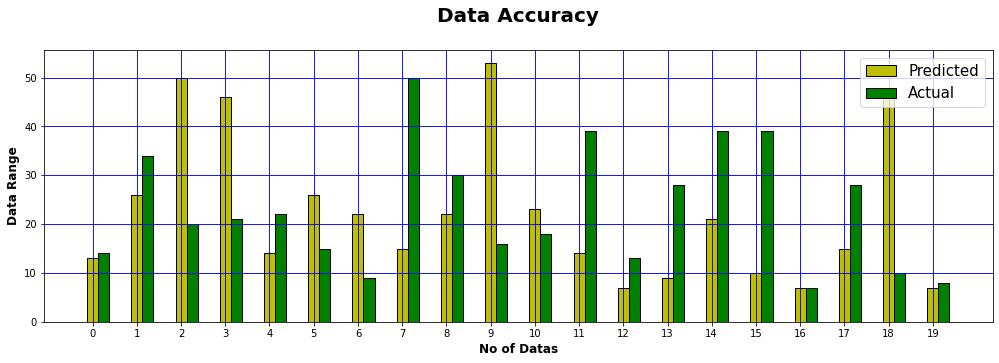

In [38]:
plt.figure(figsize=(17,5))
no_of_data_show =20 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show(25)

# Bucketing

Instead of trying to predict DOM down to the exact date (which is unnecessarily precise), what if we just wanted to predict roughly how many weeks it would take to sell? Or rather, in *which* week would it likely sell in?

For our revised model, we will be dividing the DOM into buckets:

- Week 1 (0-7 days)
- Week 2 (8-14 days)
- Week 3 (15-21 days)
- Week 4 (22-28 days)
- Week 5 (29-35 days)
- Week 6 (36-42 days)
- Week 7 (43-49 days)
- Week 8 (50-56 days)
- More than 8 weeks (57+ days)

We will be keeping the listings that sell under 1 week, and aggregating all the listings that sell over 2 months into one category.

In [39]:
df

,ML #,Address,List Date,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,...,3,4,5,6,7,8,9,10,11,12
0,V682144,6 7380 ELMBRIDGE WAY,2008-01-01,4.266599,2008-01-27,26,-0.374256,348000.0,282.21,266.87,...,0,0,0,0,0,0,0,0,0,0
1,V682051,506 9188 HEMLOCK DRIVE,2008-01-02,4.266599,2008-01-05,3,-0.648566,293000.0,473.85,450.77,...,0,0,0,0,0,0,0,0,0,0
2,V682101,1200 7760 GRANVILLE AVENUE,2008-01-02,4.266599,2008-01-07,5,0.220083,476800.0,334.68,320.43,...,0,0,0,0,0,0,0,0,0,0
3,V681921,1304 6088 MINORU BOULEVARD,2008-01-02,4.266599,2008-02-11,40,0.174364,473000.0,466.54,452.20,...,0,0,0,0,0,0,0,0,0,0
4,V682478,303 8100 JONES ROAD,2008-01-02,4.266599,2008-01-23,21,-0.686055,282800.0,340.30,321.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,R2564618,211 5700 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-15,3,0.498050,558800.0,721.03,721.03,...,0,1,0,0,0,0,0,0,0,0
23543,R2564074,326 5800 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-19,7,0.773275,621000.0,573.15,575.00,...,0,1,0,0,0,0,0,0,0,0
23544,R2564090,212 7251 MINORU BOULEVARD,2021-04-12,-0.830631,2021-04-20,8,0.220083,500000.0,478.85,480.77,...,0,1,0,0,0,0,0,0,0,0
23545,R2565857,209 9300 PARKSVILLE DRIVE,2021-04-12,-0.830631,2021-04-20,8,-0.228872,401000.0,473.14,474.56,...,0,1,0,0,0,0,0,0,0,0


In [40]:
bins = [0, 7, 14, 21, 28, 35, 42, 49, 56, np.inf]
names = [1, 2, 3, 4, 5, 6, 7, 8, 9]

df['DOMRange'] = pd.cut(df['DOM'], bins, labels=names)
df

,ML #,Address,List Date,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,...,4,5,6,7,8,9,10,11,12,DOMRange
0,V682144,6 7380 ELMBRIDGE WAY,2008-01-01,4.266599,2008-01-27,26,-0.374256,348000.0,282.21,266.87,...,0,0,0,0,0,0,0,0,0,4
1,V682051,506 9188 HEMLOCK DRIVE,2008-01-02,4.266599,2008-01-05,3,-0.648566,293000.0,473.85,450.77,...,0,0,0,0,0,0,0,0,0,1
2,V682101,1200 7760 GRANVILLE AVENUE,2008-01-02,4.266599,2008-01-07,5,0.220083,476800.0,334.68,320.43,...,0,0,0,0,0,0,0,0,0,1
3,V681921,1304 6088 MINORU BOULEVARD,2008-01-02,4.266599,2008-02-11,40,0.174364,473000.0,466.54,452.20,...,0,0,0,0,0,0,0,0,0,6
4,V682478,303 8100 JONES ROAD,2008-01-02,4.266599,2008-01-23,21,-0.686055,282800.0,340.30,321.00,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,R2564618,211 5700 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-15,3,0.498050,558800.0,721.03,721.03,...,1,0,0,0,0,0,0,0,0,1
23543,R2564074,326 5800 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-19,7,0.773275,621000.0,573.15,575.00,...,1,0,0,0,0,0,0,0,0,1
23544,R2564090,212 7251 MINORU BOULEVARD,2021-04-12,-0.830631,2021-04-20,8,0.220083,500000.0,478.85,480.77,...,1,0,0,0,0,0,0,0,0,2
23545,R2565857,209 9300 PARKSVILLE DRIVE,2021-04-12,-0.830631,2021-04-20,8,-0.228872,401000.0,473.14,474.56,...,1,0,0,0,0,0,0,0,0,2


In [41]:
df["DOMRange"].fillna(1, inplace=True) # converting NaN into 'Week 1' which it should be
df

,ML #,Address,List Date,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,...,4,5,6,7,8,9,10,11,12,DOMRange
0,V682144,6 7380 ELMBRIDGE WAY,2008-01-01,4.266599,2008-01-27,26,-0.374256,348000.0,282.21,266.87,...,0,0,0,0,0,0,0,0,0,4
1,V682051,506 9188 HEMLOCK DRIVE,2008-01-02,4.266599,2008-01-05,3,-0.648566,293000.0,473.85,450.77,...,0,0,0,0,0,0,0,0,0,1
2,V682101,1200 7760 GRANVILLE AVENUE,2008-01-02,4.266599,2008-01-07,5,0.220083,476800.0,334.68,320.43,...,0,0,0,0,0,0,0,0,0,1
3,V681921,1304 6088 MINORU BOULEVARD,2008-01-02,4.266599,2008-02-11,40,0.174364,473000.0,466.54,452.20,...,0,0,0,0,0,0,0,0,0,6
4,V682478,303 8100 JONES ROAD,2008-01-02,4.266599,2008-01-23,21,-0.686055,282800.0,340.30,321.00,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,R2564618,211 5700 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-15,3,0.498050,558800.0,721.03,721.03,...,1,0,0,0,0,0,0,0,0,1
23543,R2564074,326 5800 ANDREWS ROAD,2021-04-12,-0.830631,2021-04-19,7,0.773275,621000.0,573.15,575.00,...,1,0,0,0,0,0,0,0,0,1
23544,R2564090,212 7251 MINORU BOULEVARD,2021-04-12,-0.830631,2021-04-20,8,0.220083,500000.0,478.85,480.77,...,1,0,0,0,0,0,0,0,0,2
23545,R2565857,209 9300 PARKSVILLE DRIVE,2021-04-12,-0.830631,2021-04-20,8,-0.228872,401000.0,473.14,474.56,...,1,0,0,0,0,0,0,0,0,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ML #                 23547 non-null  object        
 1   Address              23547 non-null  object        
 2   List Date            23547 non-null  datetime64[ns]
 3   Prime Rate           23547 non-null  float64       
 4   Sold Date            23547 non-null  datetime64[ns]
 5   DOM                  23547 non-null  int64         
 6   List Price           23547 non-null  float64       
 7   Sold Price           23547 non-null  float64       
 8   List Price per SqFt  23547 non-null  float64       
 9   Sold Price per SqFt  23547 non-null  float64       
 10  SL/LP Ratio          23547 non-null  float64       
 11  Tot BR               23547 non-null  float64       
 12  Tot Baths            23547 non-null  float64       
 13  TotFlArea            23547 non-

In [43]:
df["DOMRange"] = df["DOMRange"].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ML #                 23547 non-null  object        
 1   Address              23547 non-null  object        
 2   List Date            23547 non-null  datetime64[ns]
 3   Prime Rate           23547 non-null  float64       
 4   Sold Date            23547 non-null  datetime64[ns]
 5   DOM                  23547 non-null  int64         
 6   List Price           23547 non-null  float64       
 7   Sold Price           23547 non-null  float64       
 8   List Price per SqFt  23547 non-null  float64       
 9   Sold Price per SqFt  23547 non-null  float64       
 10  SL/LP Ratio          23547 non-null  float64       
 11  Tot BR               23547 non-null  float64       
 12  Tot Baths            23547 non-null  float64       
 13  TotFlArea            23547 non-

In [45]:
x=df.drop(columns=['ML #','Address','List Date','Sold Date','Sold Price','DOM','Sold Price per SqFt',
                  'TotFlArea','Tot Baths','Yr Blt','Tot BR','Prime Rate','DOMRange'],axis=1) #independent
y=df['DOMRange'] #dependent

x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.75,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17660, 38)
(5887, 38)
(17660,)
(5887,)


In [46]:
model=RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(x_train, y_train)

y_predict=model.predict(x_test)

In [47]:
MSE=mean_squared_error(y_test,y_predict)
print('Mean Square Error :',MSE)

Mean Square Error : 15.733820281977238


In [48]:
y_error=y_test-y_predict
accuracy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error,accuracy
                                 ])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accuracy%'})
error_data

,Actual,Predicted,Error,Accuracy%
0,1.0,1.0,0.0,0.0
1,5.0,9.0,-4.0,80.0
2,9.0,9.0,0.0,0.0
3,1.0,9.0,-8.0,800.0
4,1.0,1.0,0.0,0.0
...,...,...,...,...
5882,2.0,4.0,-2.0,100.0
5883,2.0,5.0,-3.0,150.0
5884,4.0,1.0,3.0,-75.0
5885,9.0,9.0,0.0,0.0


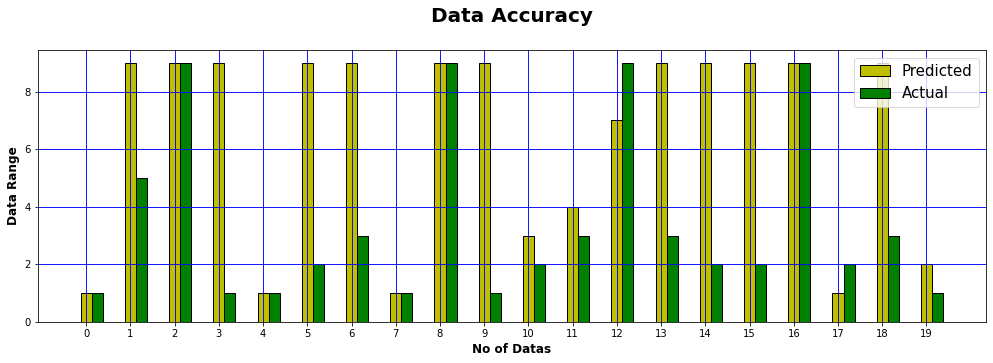

In [49]:
plt.figure(figsize=(17,5))
no_of_data_show =20 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show(25)

Our margin of error is the square root of 15.7 = 3.9 weeks, i.e. almost 1 month. That's actually worse than before.

Ok, what if we omit the <1 week and >8 week DOM, that way we can compare apples to apples.

In [50]:
low = 2
high = 8

mask = (df['DOMRange'] >= low) & (df['DOMRange'] <= high)

df = df.loc[mask]
df

,ML #,Address,List Date,Prime Rate,Sold Date,DOM,List Price,Sold Price,List Price per SqFt,Sold Price per SqFt,...,4,5,6,7,8,9,10,11,12,DOMRange
0,V682144,6 7380 ELMBRIDGE WAY,2008-01-01,4.266599,2008-01-27,26,-0.374256,348000.0,282.21,266.87,...,0,0,0,0,0,0,0,0,0,4
3,V681921,1304 6088 MINORU BOULEVARD,2008-01-02,4.266599,2008-02-11,40,0.174364,473000.0,466.54,452.20,...,0,0,0,0,0,0,0,0,0,6
4,V682478,303 8100 JONES ROAD,2008-01-02,4.266599,2008-01-23,21,-0.686055,282800.0,340.30,321.00,...,0,0,0,0,0,0,0,0,0,3
6,V682240,201 8600 ACKROYD ROAD,2008-01-02,4.266599,2008-01-19,17,-1.009741,223000.0,278.93,271.62,...,0,0,0,0,0,0,0,0,0,3
8,V682041,3315 5119 GARDEN CITY ROAD,2008-01-03,4.266599,2008-02-19,47,0.114931,470000.0,368.79,364.91,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23534,R2564865,221 5311 CEDARBRIDGE WAY,2021-04-12,-0.830631,2021-05-16,34,1.000952,668000.0,696.67,695.83,...,1,0,0,0,0,0,0,0,0,5
23539,R2564329,705 5900 ALDERBRIDGE WAY,2021-04-12,-0.830631,2021-04-20,8,0.228769,532000.0,866.38,922.01,...,1,0,0,0,0,0,0,0,0,2
23541,R2564377,1107 8460 GRANVILLE AVENUE,2021-04-12,-0.830631,2021-04-20,8,-0.003937,520000.0,725.36,840.06,...,1,0,0,0,0,0,0,0,0,2
23544,R2564090,212 7251 MINORU BOULEVARD,2021-04-12,-0.830631,2021-04-20,8,0.220083,500000.0,478.85,480.77,...,1,0,0,0,0,0,0,0,0,2


In [51]:
x=df.drop(columns=['ML #','Address','List Date','Sold Date','Sold Price','DOM','Sold Price per SqFt',
                  'TotFlArea','Tot Baths','Yr Blt','Tot BR','Prime Rate','DOMRange'],axis=1) #independent
y=df['DOMRange'] #dependent

x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.75,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8931, 38)
(2978, 38)
(8931,)
(2978,)


In [52]:
model=RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(x_train, y_train)

y_predict=model.predict(x_test)

In [53]:
MSE=mean_squared_error(y_test,y_predict)
print('Mean Square Error :',MSE)

Mean Square Error : 6.729684351914036


In [54]:
y_error=y_test-y_predict
accuracy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error,accuracy
                                 ])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accuracy%'})
error_data

,Actual,Predicted,Error,Accuracy%
0,5.0,3.0,2.0,-40.00
1,2.0,2.0,0.0,0.00
2,3.0,8.0,-5.0,166.67
3,4.0,2.0,2.0,-50.00
4,2.0,8.0,-6.0,300.00
...,...,...,...,...
2973,4.0,2.0,2.0,-50.00
2974,7.0,2.0,5.0,-71.43
2975,4.0,2.0,2.0,-50.00
2976,2.0,2.0,0.0,0.00


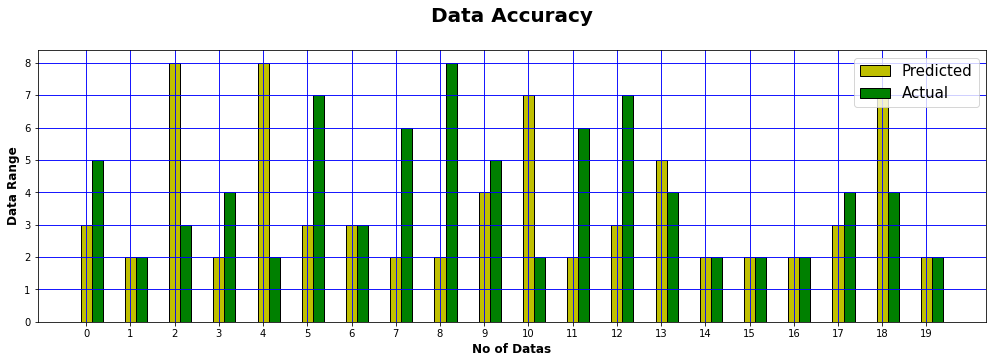

In [55]:
plt.figure(figsize=(17,5))
no_of_data_show =20 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No of Datas",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show(25)

The square root of our mean squared values is 2.59! Meaning we can predict it on average within 2.59 weeks.

# Conclusion

We discovered that the best predictors of DOM were:
- **List Price**
- **List Price per SqFt**
- **SL/LP Ratio**
- **Age**
- **Sub-Area/Community**
- **Month**

Through trial and error, I noticed that the single largest predictor of DOM was the **SL/LP Ratio**. While it is not possible to predict this before the condo is sold, of course, I think it is good to include it because it is useful to the seller during the negotiation process to know that the more wiggle room you give to the buyer (i.e. letting them have a lower price), the quicker the condo will sell.

As I predicted before, seasonalities do play a role. In general, during bad weather, a showing can expect 30% less traffic compared to good weather. So it makes sense that during months with typically poorer weather in Vancouver, it will take longer to sell.

We were ultimately able to predict DOM within **3 weeks** using our non-bucketed model. When bucketed, we were able to reduce it down to **2.59 weeks**.

Given that our time frame in the dataset was between 7-60 days, realistically we can only predict if a condo will sell within **1 month or 2 months**. This in itself is useful information. Ermolin's paper was able to do it within 1 week, so perhaps there is room to improve on this project. Predicting DOM is no easy feat, because there are many factors outside our control, such as weather (during a very rainy or hot week in Vancouver, for example), plus if for some reason the buyer/seller is unreasonable, this will needlessly drag out the process.

**Ethical Concerns**

The dataset that was used for this project is paid, and can only be used according to their terms and conditions (which this data project satisfies). It cannot be made public.

# Application

In [91]:
list_price = input('List price:')
list_sqft = input('List price/sq ft:')
sl_lp = input('SL/LP Ratio:')
age = input('Age:')
area = input('Sub-Area/Community:')
month = input('Month (Numeric):')

q = []
q.append([list_price, list_sqft, sl_lp, age, area, month])

q = pd.DataFrame(query, columns=['List Price', 
                                 'List Price per SqFt', 
                                 'SL/LP Ratio',
                                 'Age', 
                                 'Sub-Area/Community', 
                                 'Month'
                                ])

q['List Price'] = q['List Price'].astype(float)
q['List Price per SqFt'] = q['List Price per SqFt'].astype(float)
q['SL/LP Ratio'] = q['SL/LP Ratio'].astype(float)
q['Age'] = q['Age'].astype(int)
q['Sub-Area/Community'] = q['Sub-Area/Community'].astype(str)
q['Month'] = q['Month'].astype(int)

y = pd.get_dummies(q["Sub-Area/Community"])
q = q.drop('Sub-Area/Community',axis = 1)
q = q.join(y)

y = pd.get_dummies(q["Month"]) 
q = q.drop('Month',axis = 1)
q = q.join(y)

model_columns = list(x.columns)
q = q.reindex(columns=model_columns, fill_value=0)

prediction = model.predict(q)
print('Prediction: ' + str(prediction))

List price:900000
List price/sq ft:132
SL/LP Ratio:0.9
Age:2
Sub-Area/Community:Steveston Village
Month (Numeric):9
Prediction: [2]
